In [212]:
import pandas as pd
import numpy as np
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import trapz

In [213]:
## load predictions based 2013 time freeze data
data_13 = pd.read_csv('/homes/fabadmus/Internship/grad_project/time_freeze/results_13', sep='\t')
data_13= data_13.drop(columns='setting')

data_13.head()

,ID,SET,NEG_prob,POS_prob,predictions,annotation
0,TWMET_00805,POS,0.05,0.95,POS,aminobutyric acid
1,TWMET_00804,POS,0.05,0.95,POS,aminobutyric acid
2,TWMET_00322,POS,0.05,0.95,POS,4-amino-butyrate
3,TWMET_00058,POS,0.06,0.94,POS,GABA
4,TWMET_00166,POS,0.07,0.93,POS,haloperidol


In [214]:
# load 2017 first layer
data_17 = pd.read_csv('/homes/fabadmus/Internship/grad_project/time_freeze/testing_park_17', sep='\t')
data_17.head()

,Unnamed: 0,subject,object,score,overlap,local_mi,subject_annotated,object_annotated
0,0,TWDIS_06685,TWMET_00170,151,9433,1424383,parkinson's disease,dopa
1,1,TWDIS_06685,TWMET_00012,41,14371,589211,parkinson's disease,dopamine
2,2,TWDIS_06685,TWMET_01157,68,916,62288,parkinson's disease,rotenone
3,3,TWDIS_06685,TWMET_00006,7,3404,23828,parkinson's disease,tyrosine
4,4,TWDIS_06685,TWMET_00848,19,745,14155,parkinson's disease,catechol


In [215]:
## load 2023 first layer
data_23 = pd.read_csv('/homes/fabadmus/Internship/grad_project/time_freeze/testing_park_23', sep='\t')
data_23.head()

,Unnamed: 0,subject,object,score,overlap,local_mi,subject_annotated,object_annotated
0,0,TWDIS_06685,TWMET_00170,108,12231,1320948,parkinson's disease,dopa
1,1,TWDIS_06685,TWMET_00012,30,18952,568560,parkinson's disease,dopamine
2,2,TWDIS_06685,TWMET_01157,59,1555,91745,parkinson's disease,rotenone
3,3,TWDIS_06685,TWMET_00006,5,4681,23405,parkinson's disease,tyrosine
4,4,TWDIS_06685,TWMET_00848,13,945,12285,parkinson's disease,catechol


In [216]:
## label 2013 predictions based on 2017 and 2013 first layers
data_13.loc[data_13['ID'].isin(set(data_17['object'])), 'tf_17'] = 'yes'
data_13.loc[data_13['ID'].isin(set(data_23['object'])), 'tf_23'] = 'yes'
data_13 = data_13.fillna('no')
data_13

,ID,SET,NEG_prob,POS_prob,predictions,annotation,tf_17,tf_23
0,TWMET_00805,POS,0.05,0.95,POS,aminobutyric acid,no,no
1,TWMET_00804,POS,0.05,0.95,POS,aminobutyric acid,no,no
2,TWMET_00322,POS,0.05,0.95,POS,4-amino-butyrate,no,no
3,TWMET_00058,POS,0.06,0.94,POS,GABA,no,no
4,TWMET_00166,POS,0.07,0.93,POS,haloperidol,yes,yes
...,...,...,...,...,...,...,...,...
219,TWMET_00011,NEG,0.98,0.02,NEG,triglyceride,no,no
220,TWMET_00032,NEG,0.99,0.01,NEG,cortisol,no,no
221,TWMET_00033,NEG,0.99,0.01,NEG,androgen,no,no
222,TWMET_00095,NEG,0.99,0.01,NEG,lipoprotein-cholesterol,no,no


In [217]:
## drop irrelevant columns from the data
data_13 = data_13.drop(columns= ['NEG_prob', 'predictions'])
data_13

,ID,SET,POS_prob,annotation,tf_17,tf_23
0,TWMET_00805,POS,0.95,aminobutyric acid,no,no
1,TWMET_00804,POS,0.95,aminobutyric acid,no,no
2,TWMET_00322,POS,0.95,4-amino-butyrate,no,no
3,TWMET_00058,POS,0.94,GABA,no,no
4,TWMET_00166,POS,0.93,haloperidol,yes,yes
...,...,...,...,...,...,...
219,TWMET_00011,NEG,0.02,triglyceride,no,no
220,TWMET_00032,NEG,0.01,cortisol,no,no
221,TWMET_00033,NEG,0.01,androgen,no,no
222,TWMET_00095,NEG,0.01,lipoprotein-cholesterol,no,no


In [218]:
## make a copy of the data for roc curve plotting
auc_data = data_13
auc_data = auc_data.drop(auc_data[auc_data.SET == 'UNK'].index)
auc_data

,ID,SET,POS_prob,annotation,tf_17,tf_23
0,TWMET_00805,POS,0.95,aminobutyric acid,no,no
1,TWMET_00804,POS,0.95,aminobutyric acid,no,no
2,TWMET_00322,POS,0.95,4-amino-butyrate,no,no
3,TWMET_00058,POS,0.94,GABA,no,no
4,TWMET_00166,POS,0.93,haloperidol,yes,yes
...,...,...,...,...,...,...
219,TWMET_00011,NEG,0.02,triglyceride,no,no
220,TWMET_00032,NEG,0.01,cortisol,no,no
221,TWMET_00033,NEG,0.01,androgen,no,no
222,TWMET_00095,NEG,0.01,lipoprotein-cholesterol,no,no


In [219]:
## make a function to plot roc
def get_roc_func(POS_prob, tresh, freeze):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i,j in zip(POS_prob,freeze ):
            if i >= tresh and j == 'yes':
                tp += 1
            elif i >= tresh and j == 'no':
                fp += 1
            elif i < tresh and j == 'no':
                tn += 1
            elif i < tresh and j== 'yes':
                fn +=1
                
    tpr = tp/(tp+fn)
    fpr = fp/(tn+fp)

    return [fpr,tpr]
        
        
    

In [220]:
get_roc_func(auc_data['POS_prob'], 0.5, auc_data['tf_17'])

[0.17647058823529413, 1.0]

In [221]:
#Now we calculate FPR and TPR for different thresholds and get AUC and ROC
thresholds = [0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1]

roc_points = []
for threshold in thresholds:
    rates = get_roc_func(auc_data['POS_prob'], threshold, auc_data['tf_23'])
    roc_points.append(rates)

In [222]:
fpr_array = []
tpr_array = []
for i in range(len(roc_points)-1):
    point1 = roc_points[i];
    point2 = roc_points[i+1]
    tpr_array.append([point1[0], point2[0]])
    fpr_array.append([point1[1], point2[1]])

In [223]:
# We use Trapezoidal rule to calculate the area under the curve and approximating the intergral  
auc = sum(np.trapz(tpr_array,fpr_array))+1
print('Area under curve={}'.format(auc))

Area under curve=0.935077519379845


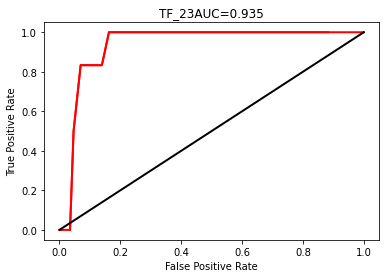

In [224]:
plt.plot(tpr_array,fpr_array, 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'TF_23AUC={round(auc, 3)}')
plt.show()


In [225]:
# data_13.to_csv('tf_validation_latest', sep='\t')